<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(0_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n250.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.467661,60.084483,58.762212,-1.267854,215.046503,216.732927,-1.686423
1,0.0,1.0,75.427604,66.787560,34.802035,0.704210,187.721409,188.051200,-0.329791
2,0.0,2.0,97.490622,35.018135,21.338932,-0.673494,163.174195,165.225789,-2.051594
3,0.0,3.0,49.162916,23.304728,31.320070,0.740369,114.528082,113.489072,1.039010
4,0.0,4.0,70.570376,70.626809,74.341997,-7.709971,217.829211,225.262074,-7.432863
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.991258,31.899005,72.465251,3.896729,153.252243,149.497143,3.755100
19996,999.0,16.0,92.759438,26.262796,77.372666,-1.900145,204.494755,205.689696,-1.194940
19997,999.0,17.0,45.690994,93.770471,21.377683,-1.003547,169.835600,171.427547,-1.591947
19998,999.0,18.0,97.475528,81.606370,32.609906,1.189751,222.881556,221.429459,1.452096


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.467661,60.084483,58.762212,-1.267854,215.046503,216.732927,-1.686423
1,0.0,1.0,75.427604,66.787560,34.802035,0.704210,187.721409,188.051200,-0.329791
2,0.0,2.0,97.490622,35.018135,21.338932,-0.673494,163.174195,165.225789,-2.051594
3,0.0,3.0,49.162916,23.304728,31.320070,0.740369,114.528082,113.489072,1.039010
4,0.0,4.0,70.570376,70.626809,74.341997,-7.709971,217.829211,225.262074,-7.432863
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.991258,31.899005,72.465251,3.896729,153.252243,149.497143,3.755100
19996,999.0,16.0,92.759438,26.262796,77.372666,-1.900145,204.494755,205.689696,-1.194940
19997,999.0,17.0,45.690994,93.770471,21.377683,-1.003547,169.835600,171.427547,-1.591947
19998,999.0,18.0,97.475528,81.606370,32.609906,1.189751,222.881556,221.429459,1.452096


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    87.467661  60.084483  58.762212 -1.267854  215.046503   
      1.0    75.427604  66.787560  34.802035  0.704210  187.721409   
      2.0    97.490622  35.018135  21.338932 -0.673494  163.174195   
      3.0    49.162916  23.304728  31.320070  0.740369  114.528082   
      4.0    70.570376  70.626809  74.341997 -7.709971  217.829211   
...                ...        ...        ...       ...         ...   
999.0 15.0   34.991258  31.899005  72.465251  3.896729  153.252243   
      16.0   92.759438  26.262796  77.372666 -1.900145  204.494755   
      17.0   45.690994  93.770471  21.377683 -1.003547  169.835600   
      18.0   97.475528  81.606370  32.609906  1.189751  222.881556   
      19.0   80.227537  56.238788  59.662487  2.823884  208.952696   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.732927 -1.686423  
      1.0    188.051200 -0.329791  
      2.0    165.225789 -2.051594  
      3.0    113.489072  1.039010  
      4.0    225.262074 -7.432863  
...                 ...       ...  
999.0 15.0   149.497143  3.755100  
      16.0   205.689696 -1.194940  
      17.0   171.427547 -1.591947  
      18.0   221.429459  1.452096  
      19.0   205.708928  3.243768  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    87.467661  60.084483  58.762212 -1.267854  215.046503   
      1.0    75.427604  66.787560  34.802035  0.704210  187.721409   
      2.0    97.490622  35.018135  21.338932 -0.673494  163.174195   
      3.0    49.162916  23.304728  31.320070  0.740369  114.528082   
      4.0    70.570376  70.626809  74.341997 -7.709971  217.829211   
...                ...        ...        ...       ...         ...   
999.0 15.0   34.991258  31.899005  72.465251  3.896729  153.252243   
      16.0   92.759438  26.262796  77.372666 -1.900145  204.494755   
      17.0   45.690994  93.770471  21.377683 -1.003547  169.835600   
      18.0   97.475528  81.606370  32.609906  1.189751  222.881556   
      19.0   80.227537  56.238788  59.662487  2.823884  208.952696   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.732927 -1.686423  
      1.0    188.051200 -0.329791  
      2.0    165.225789 -2.051594  
      3.0    113.489072  1.039010  
      4.0    225.262074 -7.432863  
...                 ...       ...  
999.0 15.0   149.497143  3.755100  
      16.0   205.689696 -1.194940  
      17.0   171.427547 -1.591947  
      18.0   221.429459  1.452096  
      19.0   205.708928  3.243768  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.467661,60.084483,58.762212,-1.267854,215.046503,216.732927,-1.686423
1,0.0,1.0,75.427604,66.787560,34.802035,0.704210,187.721409,188.051200,-0.329791
2,0.0,2.0,97.490622,35.018135,21.338932,-0.673494,163.174195,165.225789,-2.051594
3,0.0,3.0,49.162916,23.304728,31.320070,0.740369,114.528082,113.489072,1.039010
4,0.0,4.0,70.570376,70.626809,74.341997,-7.709971,217.829211,225.262074,-7.432863
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.991258,31.899005,72.465251,3.896729,153.252243,149.497143,3.755100
19996,999.0,16.0,92.759438,26.262796,77.372666,-1.900145,204.494755,205.689696,-1.194940
19997,999.0,17.0,45.690994,93.770471,21.377683,-1.003547,169.835600,171.427547,-1.591947
19998,999.0,18.0,97.475528,81.606370,32.609906,1.189751,222.881556,221.429459,1.452096


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    87.467661  60.084483  58.762212 -1.267854  215.046503   
      1.0    75.427604  66.787560  34.802035  0.704210  187.721409   
      2.0    97.490622  35.018135  21.338932 -0.673494  163.174195   
      3.0    49.162916  23.304728  31.320070  0.740369  114.528082   
      4.0    70.570376  70.626809  74.341997 -7.709971  217.829211   
...                ...        ...        ...       ...         ...   
999.0 15.0   34.991258  31.899005  72.465251  3.896729  153.252243   
      16.0   92.759438  26.262796  77.372666 -1.900145  204.494755   
      17.0   45.690994  93.770471  21.377683 -1.003547  169.835600   
      18.0   97.475528  81.606370  32.609906  1.189751  222.881556   
      19.0   80.227537  56.238788  59.662487  2.823884  208.952696   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.732927 -1.686423  
      1.0    188.051200 -0.329791  
      2.0    165.225789 -2.051594  
      3.0    113.489072  1.039010  
      4.0    225.262074 -7.432863  
...                 ...       ...  
999.0 15.0   149.497143  3.755100  
      16.0   205.689696 -1.194940  
      17.0   171.427547 -1.591947  
      18.0   221.429459  1.452096  
      19.0   205.708928  3.243768  

[20000 rows x 7 columns]

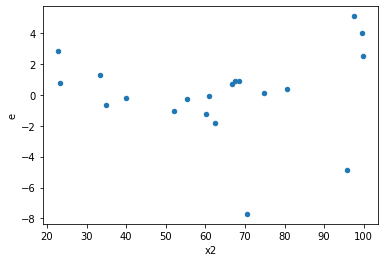

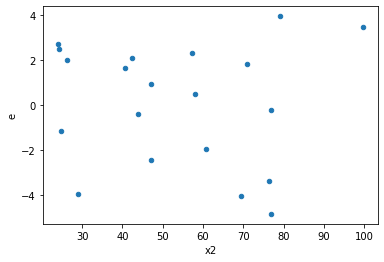

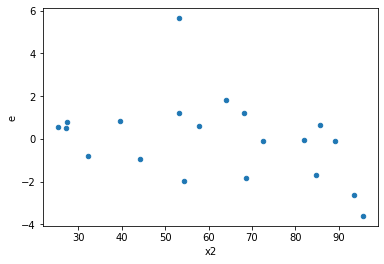

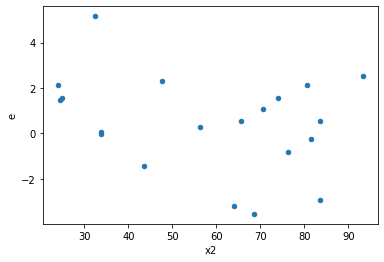

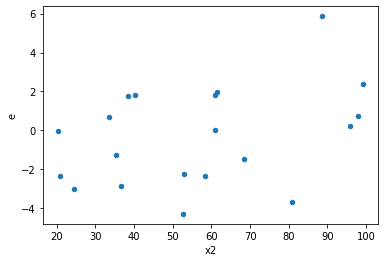

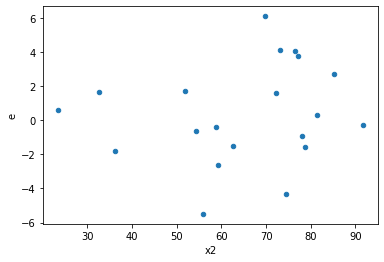

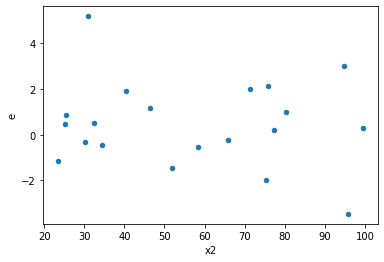

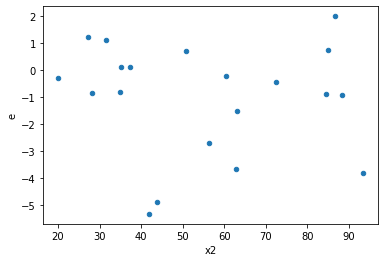

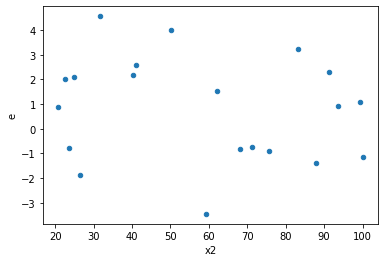

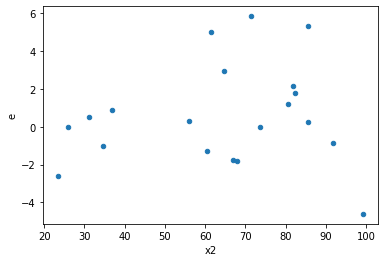

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,7.113221074323553,84.34022813441294,1.4226442148647105,16.868045626882587,11.856826500002104,0.016827052102651674,0.9915864739486742,0.008413526051325837,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,27.957698253573156,36.961084750963835,5.5915396507146315,7.392216950192767,1.3220360422997266,0.7668154686881192,0.6165922656559404,0.3834077343440596,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,7.790910732264711,13.533824322020564,1.5581821464529422,2.706764864404113,1.7371299437397696,0.5592064782607444,0.7203967608696278,0.2796032391303722,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,23.08154730356131,30.406316765650725,4.616309460712262,6.081263353130145,1.3173430864818694,0.7696926953380627,0.6151536523309686,0.38484634766903136,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,8.490607753558988,18.205618202756256,1.6981215507117977,3.641123640551251,2.1442067200813804,0.4222892319970508,0.7888553840014746,0.2111446159985254,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,28.68072038993707,42.837578516995556,5.736144077987413,8.567515703399112,1.4936019017160242,0.6704989233431329,0.6647505383284336,0.33524946167156644,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,2.4715512189965962,15.428175817113875,0.49431024379931926,3.0856351634227748,6.242304710714199,0.06589711413608268,0.9670514429319587,0.03294855706804134,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,16.17229312764984,25.358106504899418,3.2344586255299683,5.071621300979883,1.5679969627525825,0.6336253599459911,0.6831873200270044,0.31681267997299556,Reject001=1 : Homoscedasticity
9.0,5.0,5.0,15.46284284320072,44.75657506483727,3.092568568640144,8.951315012967454,2.894459674633343,0.26831229410105517,0.8658438529494724,0.13415614705052759,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,7.113221074323553,84.34022813441294,1.4226442148647105,16.868045626882587,11.856826500002104,0.016827052102651674,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,27.957698253573156,36.961084750963835,5.5915396507146315,7.392216950192767,1.3220360422997266,0.7668154686881192,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,7.790910732264711,13.533824322020564,1.5581821464529422,2.706764864404113,1.7371299437397696,0.5592064782607444,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,23.08154730356131,30.406316765650725,4.616309460712262,6.081263353130145,1.3173430864818694,0.7696926953380627,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,8.490607753558988,18.205618202756256,1.6981215507117977,3.641123640551251,2.1442067200813804,0.4222892319970508,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,28.68072038993707,42.837578516995556,5.736144077987413,8.567515703399112,1.4936019017160242,0.6704989233431329,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,2.4715512189965962,15.428175817113875,0.49431024379931926,3.0856351634227748,6.242304710714199,0.06589711413608268,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,23.298285702435596,8.490955135627843,4.659657140487119,1.6981910271255685,0.3644454894267264,0.2921540733499727,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,16.17229312764984,25.358106504899418,3.2344586255299683,5.071621300979883,1.5679969627525825,0.6336253599459911,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      987
Reject001=0 : Heteroscedasticity     13
Name: Result_test, dtype: int64